In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data_path = join('data/', 'train.csv')
sub_data_path = join('data/', 'test.csv')

## 1. 데이터 확인

1. ID : 집을 구분하는 번호
2. date : 집을 구매한 날짜
3. price : 타겟 변수인 집의 가격
4. bedrooms : 침실의 수
5. bathrooms : 침실당 화장실 개수
6. sqft_living : 주거 공간의 평방 피트
7. sqft_lot : 부지의 평방 피트
8. floors : 집의 층 수
9. waterfront : 집의 전방에 강이 흐르는지 유무 (a.k.a. 리버뷰)
10. view : 집이 얼마나 좋아 보이는지의 정도
11. condition : 집의 전반적인 상태
12. grade : King County grading 시스템 기준으로 매긴 집의 등급
13. sqft_above : 지하실을 제외한 평방 피트
14. sqft_basement : 지하실의 평방 피트
15. yr_built : 집을 지은 년도
16. yr_renovated : 집을 재건축한 년도
17. zipcode : 우편번호
18. lat : 위도
19. long : 경도
20. sqft_living15 : 2015년 기준 주거 공간의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)
21. sqft_lot15 : 2015년 기준 부지의 평방 피트(집을 재건축했다면, 변화가 있을 수 있음)

In [41]:
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)
print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))

train data dim : (15035, 21)
sub data dim : (6468, 20)


In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

### 타겟 데이터 분리

In [45]:
y = data['price']

del data['price']

### 상관계수 확인

In [10]:
# 연도, 월만 남기기
data['date'] = data['date'].apply(lambda x : x[:6]).astype(int)

<AxesSubplot:>

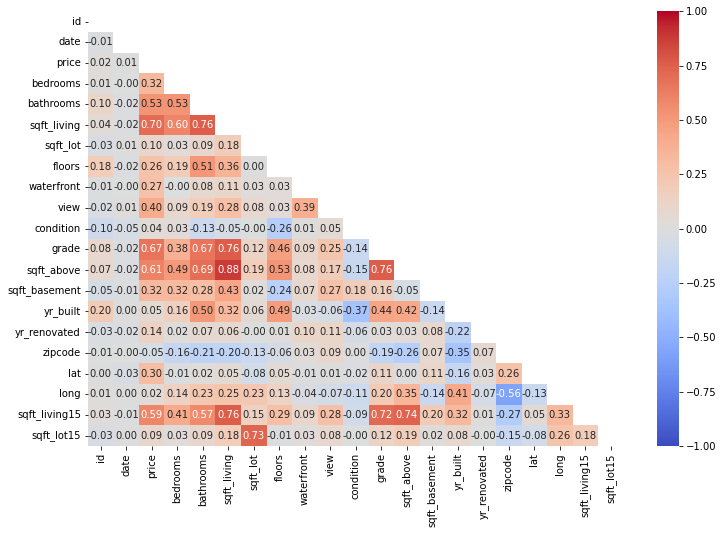

In [11]:
df = data
df['price']=y
cm = df.corr()
matrix = np.triu(cm) # mask
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(cm, annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix, ax=ax)

id, date, sqft_lot, condition, yr_built, zipcode, long, sqft_lot15는 상관계수 0.1이하

In [ ]:
cols = ['date', 'sqft_lot', 'condition', 'yr_built', 'zipcode', 'long', 'sqft_lot15']

fig, ax = plt.subplots(4, 2, figsize=(12, 30)) 

count = 0
for row in range(4):
    for col in range(2):
        sns.scatterplot(data[cols[count]], y, ax=ax[row][col])
        ax[row][col].set_title(cols[count], fontsize=15)
        count += 1
        if count == 7 :
            break

#### 분석을 위해 train, test 데이터 합치기

In [42]:
train_len = len(data)
data = pd.concat((data, sub), axis=0)

## 2. 전처리 

### 결측치 확인

In [14]:
for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

id : 0
date : 0
price : 6468
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0


결측치 없음

### id, date 변수 정리

In [43]:
# id는 예측에 필요 없으므로 데이터셋에서 삭제
if 'id' in data.columns:
    sub_id = data['id'][train_len:]
    del data['id']

In [44]:
# 연도, 월만 남기기
data['date'] = data['date'].apply(lambda x : x[:6]).astype(int)

In [17]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,201410,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,201502,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,201502,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,201406,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,201501,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


### 이상치 확인

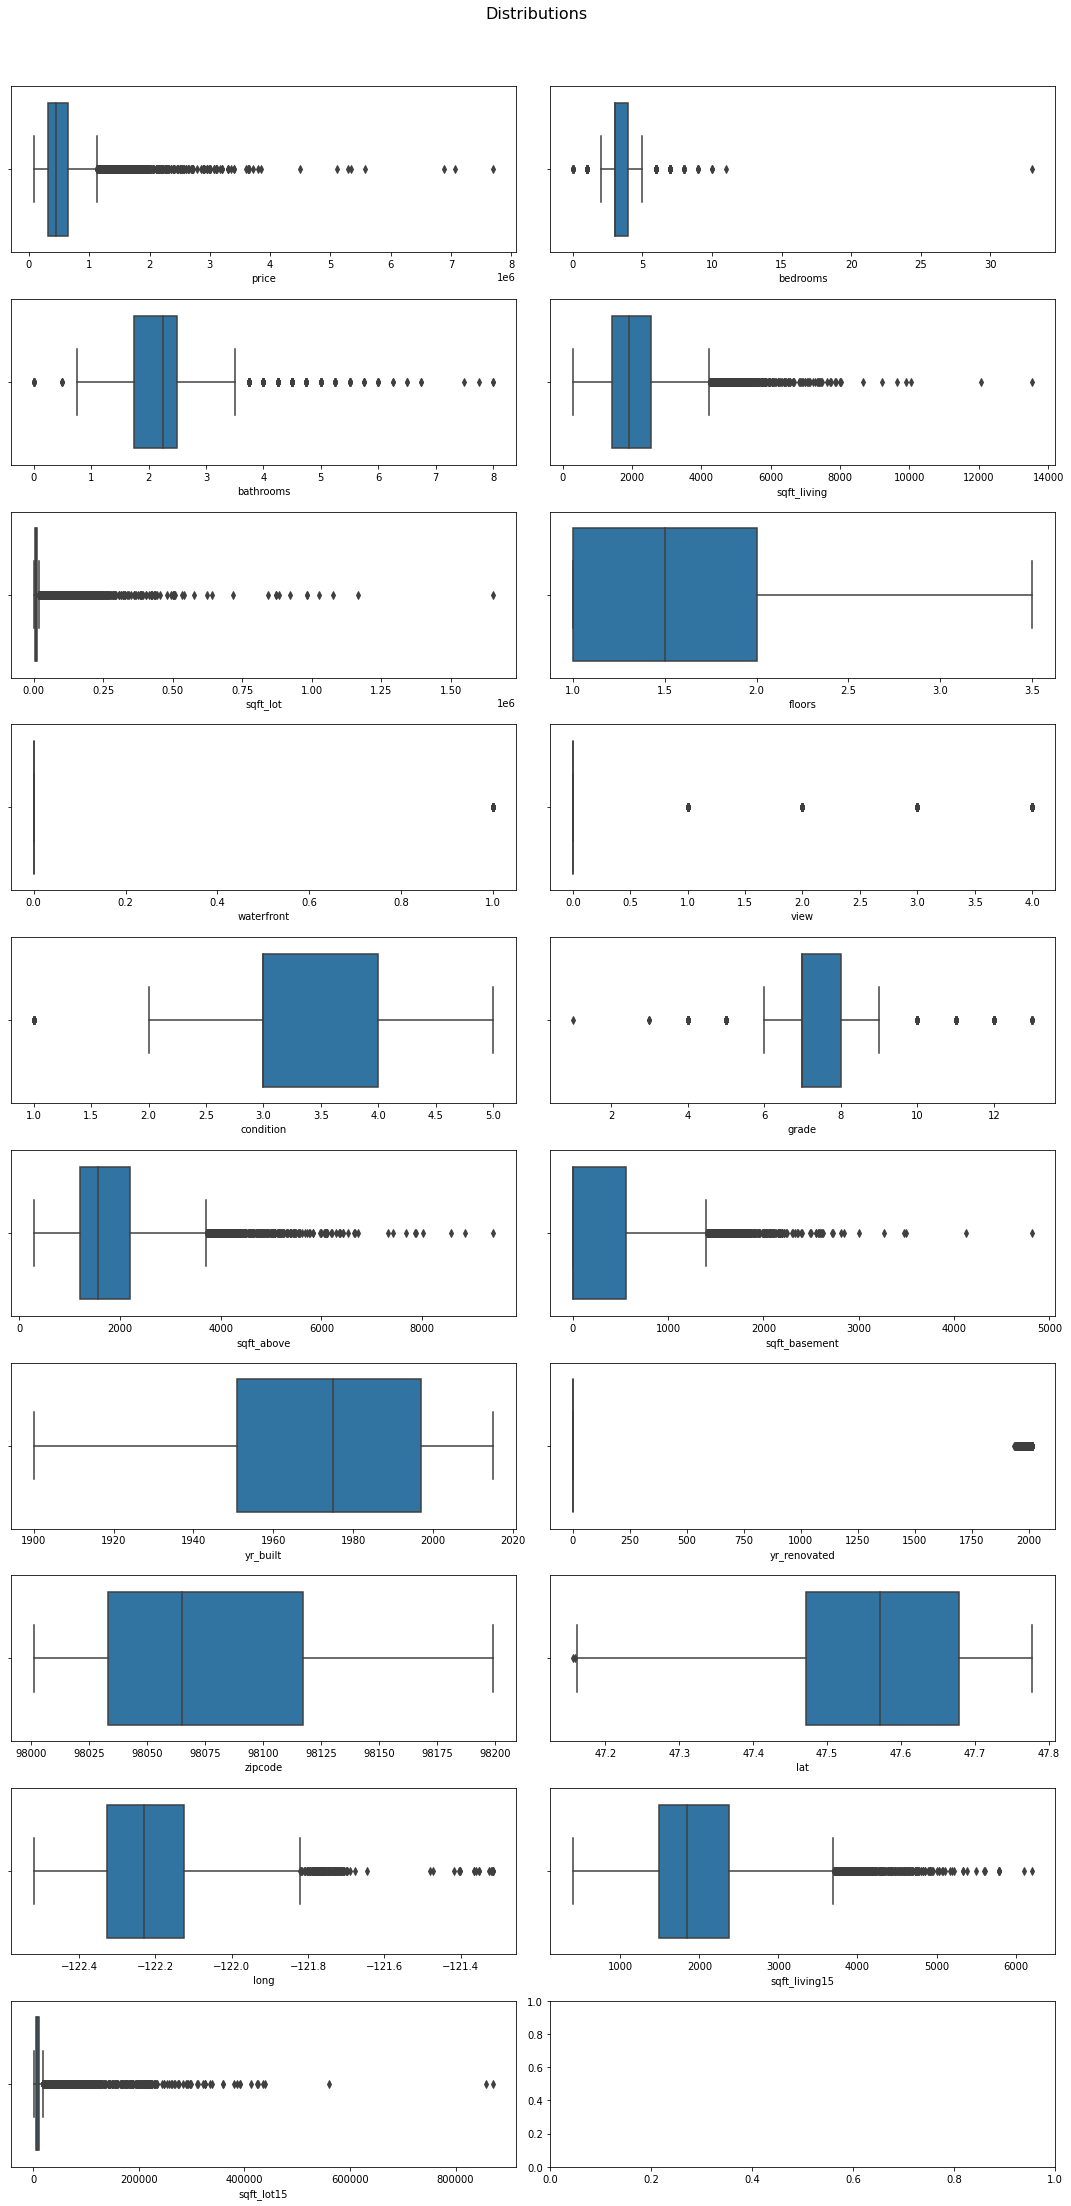

In [18]:
def plotOutlier(df):
  nrows=int(len(df.columns)/2)
  fig, axs = plt.subplots(nrows=nrows, ncols=2, figsize=(15, 30))
  axs = axs.flatten()

  for i in range(1, len(df.columns)):
    sns.boxplot(x=df.columns[i], data=df, ax=axs[i-1], orient='v')

  plt.suptitle('Distributions', y=1.02, fontsize=16)
  plt.tight_layout()
  plt.show()

plotOutlier(data)

bedrooms, bathrooms, condition, zipcode, lat 확인해 볼 필요 있음

In [19]:
def CalcIQR(data, cols):
    for col in cols:
        Q3, Q1 = np.percentile(data[col], [75 ,25])
        IQR = Q3 - Q1
        result = data[(Q1-1.5*IQR > data[col])|(Q3+1.5*IQR < data[col])]
        print(col, ": ", len(result))
        
cols = ['bedrooms', 'bathrooms', 'condition', 'zipcode', 'lat']
CalcIQR(data, cols)

bedrooms :  541
bathrooms :  569
condition :  29
zipcode :  0
lat :  2


### 각 변수들의 분포 확인

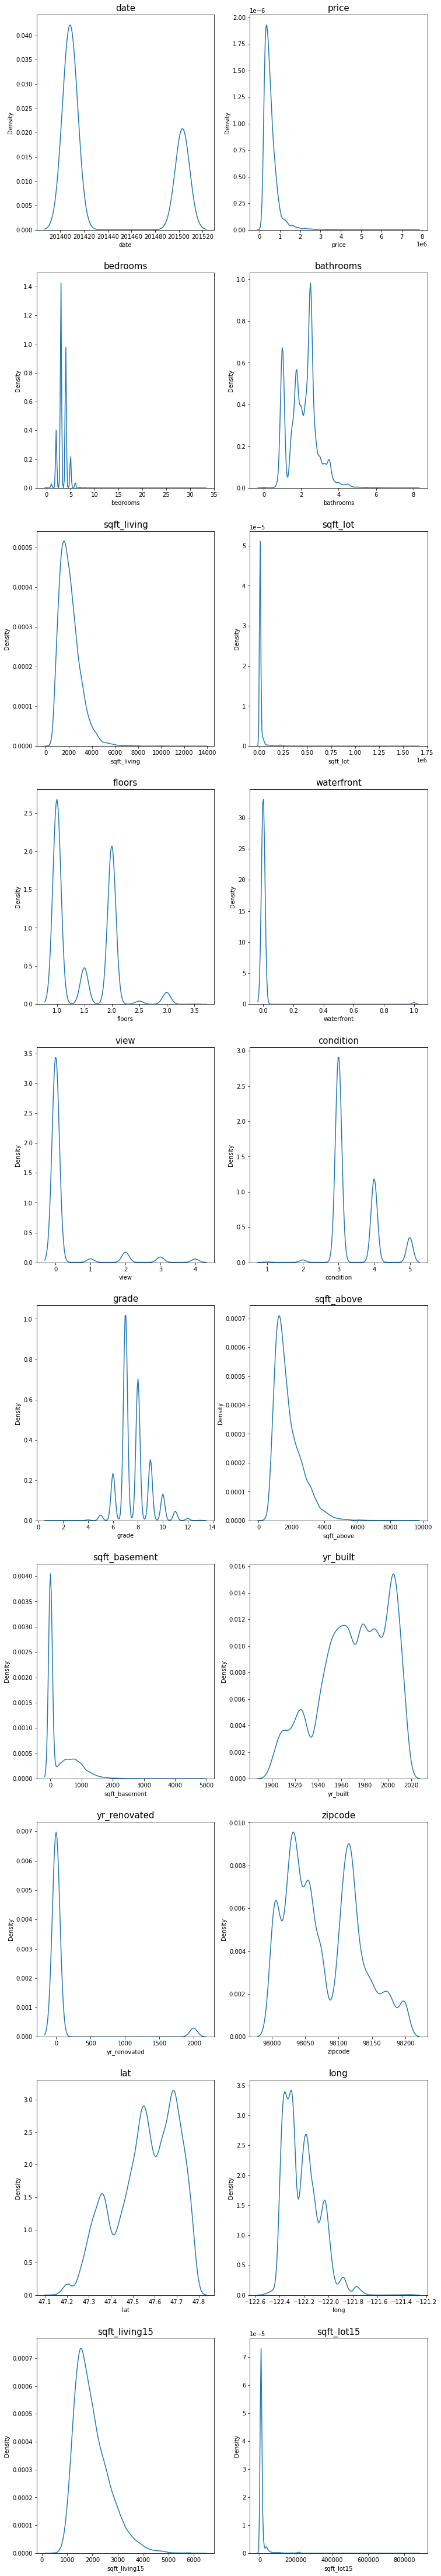

In [20]:
def plotDistribution(data, cols):
    num_cols = len(cols)
    nrows = int(np.ceil(num_cols/2))
    
    fig, ax = plt.subplots(nrows, 2, figsize=(12, int(num_cols*4))) 

    count = 0
    for row in range(nrows):
        for col in range(2):
            sns.kdeplot(data=data[cols[count]], ax=ax[row][col])
            ax[row][col].set_title(cols[count], fontsize=15)
            count += 1
            if count == num_cols :
                return
            
plotDistribution(data, data.columns)

#### 로그 변환
price, bedrooms, sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 한쪽으로 치우침

In [ ]:
sns.kdeplot(y)    # 'price' 로그 변환

In [ ]:
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)


In [ ]:
y = np.log1p(y)

### 데이터셋 나누기
훈련용, 제출용으로 나눔

In [21]:
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

### 정규화
train 데이터 기준으로 정규화 해야 하므로 데이터셋 분리 후에 정규화 시행

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
scaler.fit_transform(x)
scaler.transform(sub)

## 3. 모델링

In [22]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

random_state=2020

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

> **모델 선택 이유** : baseline에 있던 네 가지 모델 이외에도 추가해보고 싶어 decision tree regressor와 adaboost regressor, linear regression로도 cross validation을 진행해봤는데 원래의 네 가지 모델보다 성능이 확연히 떨어짐. 따라서 기본 네 가지 모델의 하이퍼 파라미터 튜닝에 집중하기로 함

### Cross Validation

In [25]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

scoring = make_scorer(rmse)

def get_cv_score(models):
    kfold = KFold(n_splits=5).get_n_splits(x.values)
    for m in models:
        score = cross_val_score(m, x.values, y, scoring = scoring)
        print("Model {} CV score : {:.4f}".format(m.__class__.__name__, np.mean(score), 
                                             kf=kfold))

> **metrics 선정 이유** : 대회 채점 기준이 rmse라 cv 단계에서부터 rmse를 확인하고 싶었음

In [26]:
get_cv_score(models)

Model GradientBoostingRegressor CV score : 10603.6356
Model XGBRegressor CV score : 10681.6730
Model LGBMRegressor CV score : 52470.2294
Model RandomForestRegressor CV score : 13808.0295


## 4. 모델 튜닝

### 하이퍼 파라미터 튜닝

###### GradientBoostingRegressor
1. `n_estimators`: Number of boosting stages to be run.
2. `learning_rate`: Shrinks the contribution of each tree.
3. `max_depth`: Maximum depth of the individual regression estimators.

###### XGBRegressor
1. `n_estimators`: Number of gradient boosted trees.
2. `learning_rate`: Step size shrinkage used to prevent overfitting.
3. `max_depth`: Maximum depth of a tree.
4. `subsample`: Fraction of samples used for fitting the individual trees.

###### LGBMRegressor 
1. `n_estimators`: Number of boosting iterations.
2. `learning_rate`: Shrinks the contribution of each tree.
3. `num_leaves`: Number of leaves in one tree.
4. `max_depth`: Maximum depth of the tree.

###### RandomForestRegressor
1. `n_estimators`: Number of trees in the forest.
2. `max_depth`: Maximum depth of the tree.
3. `min_samples_split`: Minimum number of samples required to split an internal node.
4. `max_features`: Number of features to consider when looking for the best split.

#### 그리드 서치

In [28]:
from sklearn.model_selection import GridSearchCV

def myGridSearch(model, x, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring=scoring, \
                        cv=5, verbose=verbose, n_jobs=n_jobs)

    grid_model.fit(x, y)
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    results = pd.DataFrame(params)
    results['score'] = score

    return results

**XGBRegressor 하이퍼 파라미터 튜닝**

In [29]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5],
}

results = myGridSearch(xgboost, x, y, param_grid)
results

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warni

KeyboardInterrupt: 

**LGBMRegressor 하이퍼 파라미터 튜닝**

In [31]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5]
}

myGridSearch(lightgbm, x, y, param_grid)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


,learning_rate,max_depth,n_estimators,score
0,0.01,3,100,152101.443520
1,0.01,3,200,76841.660599
2,0.01,4,100,147445.884029
3,0.01,4,200,74140.909509
4,0.01,5,100,146725.002168
5,0.01,5,200,73701.479801
6,0.10,3,100,52949.024479
7,0.10,3,200,54343.129437
8,0.10,4,100,52577.418707
9,0.10,4,200,53177.285937


**RandomForestRegressor 하이퍼 파라미터 튜닝**

In [32]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
}

myGridSearch(rdforest, x, y, param_grid)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


,max_depth,n_estimators,score
0,10,100,15139.555988
1,10,200,14482.706395
2,20,100,13808.029483
3,20,200,13670.486898
4,30,100,13808.029483
5,30,200,13670.486898


#### 랜덤 서치

In [35]:
from sklearn.model_selection import RandomizedSearchCV

def myRandomSearch(model, x, y, param_distributions, verbose=2, n_jobs=-1):
    random_search = RandomizedSearchCV(model, param_distributions=param_distributions, \
                                       scoring=scoring, \
                                       cv=5, verbose=verbose, n_jobs=n_jobs, n_iter=10)

    random_search.fit(x, y)
    params = random_search.cv_results_['params']
    score = random_search.cv_results_['mean_test_score']

    results = pd.DataFrame(params)
    results['score'] = score

    return results


**GradientBoostingRegressor 하이퍼 파라미터 튜닝**

In [36]:
param_dist = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5],
}

myRandomSearch(gboost, x, y, param_dist)

[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=100; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=4, n_estimators=200; total time=   2.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   1.6s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   3.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.6s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   1.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=200; total time=   1.8s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   1.1s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   1.3s
[CV] END .....................max_depth=10, n_estimators=100; total time=  44.7s
[CV] END ...................

KeyboardInterrupt: 

### Make Submission

In [39]:
gboost = GradientBoostingRegressor(n_estimators=10, learning_rate=0.01, max_depth=3, random_state=random_state)
xgboost = XGBRegressor(n_estimators=10, learning_rate=0.01, max_depth=3, random_state=random_state)
lightgbm = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
rdforest = RandomForestRegressor(n_estimators=10, max_depth=3, random_state=random_state)
models = [gboost, xgboost, lightgbm, rdforest]

def AveragingBlending(models, x, y, sub_x):
    # 각 모델에 학습
    for model in models:
        model.fit(x, y)
    
    # 예측값 산출
    predictions = np.column_stack([
        model.predict(sub_x) for model in models
    ])
    
    # 예측값 평균
    return np.mean(predictions, axis=1)

In [40]:
y_pred = AveragingBlending(models, x, y, sub)

ValueError: Input X contains NaN.
GradientBoostingRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
sub = pd.DataFrame(data={'id':sub_id,'price':y_pred})

In [ ]:
sub.to_csv('submission.csv', index=False)